# Funciones anónimas Lambda

## Importación de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Funciones Lambda simples

In [2]:
cuadrado = lambda x : x ** 2
cuadrado

<function __main__.<lambda>(x)>

In [3]:
cuadrado(10)

100

In [4]:
cuadrado(10 + 5j)

(75+100j)

In [5]:
agregar_elemento = lambda x, a : x.append(a)
agregar_elemento

<function __main__.<lambda>(x, a)>

In [6]:
agregar_elemento(["a", "b"], "c")

In [7]:
lista = ["a", "b"]
agregar_elemento(lista, "c")
lista

['a', 'b', 'c']

## Datasets de prueba en Seaborn

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [10]:
df["abbrev"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [11]:
df["total2"] = df.apply(lambda x : x["total"] * 10, axis = 1)
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total2
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,188.0
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,181.0
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,186.0
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,224.0
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,120.0


In [12]:
df["total3"] = df["total"].apply(lambda x : x * 100)
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total2,total3
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,188.0,1880.0
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,181.0,1810.0
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,186.0,1860.0
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,224.0,2240.0
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,120.0,1200.0


In [13]:
df["ins_premium_type"] = df["ins_premium"].apply(lambda x : "High" if x >= 1000 else "Regular" if x >= 750 else "Low")
df.sample(10, random_state = 42)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total2,total3,ins_premium_type
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX,194.0,1940.0,High
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC,239.0,2390.0,Regular
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA,127.0,1270.0,Regular
12,15.3,5.508,4.437,13.005,14.994,641.96,82.75,ID,153.0,1530.0,Low
24,17.6,2.640,5.456,1.760,17.600,896.07,155.77,MS,176.0,1760.0,Regular
31,18.4,3.496,4.968,12.328,18.032,869.85,120.75,NM,184.0,1840.0,Regular
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY,214.0,2140.0,Regular
32,12.3,3.936,3.567,10.824,9.840,1234.31,150.01,NY,123.0,1230.0,High
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,224.0,2240.0,Regular
30,11.2,1.792,3.136,9.632,8.736,1301.52,159.85,NJ,112.0,1120.0,High


In [14]:
df["score_spal"] = df.apply(lambda x : x["speeding"] * x["alcohol"], axis = 1)
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total2,total3,ins_premium_type,score_spal
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,181.0,1810.0,High,33.580025
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA,106.0,1060.0,Regular,15.573096
19,15.1,5.738,4.530,13.137,12.684,661.88,96.57,ME,151.0,1510.0,Low,25.993140
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,136.0,1360.0,Regular,19.161856
24,17.6,2.640,5.456,1.760,17.600,896.07,155.77,MS,176.0,1760.0,Regular,14.403840
37,12.8,4.224,3.328,8.576,11.520,804.71,104.61,OR,128.0,1280.0,Regular,14.057472
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA,82.0,820.0,High,5.412820
30,11.2,1.792,3.136,9.632,8.736,1301.52,159.85,NJ,112.0,1120.0,High,5.619712
39,11.1,3.774,4.218,10.212,8.769,1148.99,148.58,RI,111.0,1110.0,High,15.918732
12,15.3,5.508,4.437,13.005,14.994,641.96,82.75,ID,153.0,1530.0,Low,24.438996


In [15]:
df["abbrev"] = df["abbrev"].apply(lambda x : x.upper())
df.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total2,total3,ins_premium_type,score_spal
44,11.3,4.859,1.808,9.944,10.848,809.38,109.48,UT,113.0,1130.0,Regular,8.785072
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT,214.0,2140.0,Regular,78.585936
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,120.0,1200.0,Regular,14.112000
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,179.0,1790.0,High,19.512969
28,14.7,5.439,4.704,13.965,14.553,1029.87,138.71,NV,147.0,1470.0,High,25.585056
35,14.1,3.948,4.794,13.959,11.562,697.73,133.52,OH,141.0,1410.0,Low,18.926712
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA,106.0,1060.0,Regular,15.573096
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,162.0,1620.0,High,29.918160
33,16.8,6.552,5.208,15.792,13.608,708.24,127.82,NC,168.0,1680.0,Low,34.122816
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA,82.0,820.0,High,5.412820


In [16]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,total2,total3,score_spal
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137,157.901961,1579.019608,26.715907
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922,41.220022,412.200218,19.019463
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000,59.000000,590.000000,3.195558
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000,127.500000,1275.000000,14.120400
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000,156.000000,1560.000000,20.012852
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000,185.000000,1850.000000,35.436272
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000,239.000000,2390.000000,88.994518


In [17]:
mu = df["score_spal"].mean()
sigma_cuadro = df["score_spal"].std()

df["score_spal"] = df["score_spal"].apply(
    lambda x : (x - mu) /  sigma_cuadro
    )

In [18]:
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total2,total3,ins_premium_type,score_spal
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,188.0,1880.0,Regular,0.769558
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,181.0,1810.0,High,0.360900
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,186.0,1860.0,Regular,0.377938
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,224.0,2240.0,Regular,-0.170012
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,120.0,1200.0,Regular,-0.662685
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,136.0,1360.0,Regular,-0.397175
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,108.0,1080.0,High,-0.389092
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,162.0,1620.0,High,0.168367
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,59.0,590.0,High,-1.236646
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,179.0,1790.0,High,-0.378714


In [22]:
df["score_spal"].mean()

np.float64(1.6544499974806255e-16)

In [20]:
df["score_spal"].std()

1.0

(array([ 4.,  5., 10.,  9.,  5.,  2.,  3.,  3.,  2.,  0.,  2.,  3.,  0.,
         0.,  1.,  0.,  1.,  0.,  1.]),
 array([-1.23664634, -0.99921929, -0.76179225, -0.52436521, -0.28693817,
        -0.04951113,  0.18791592,  0.42534296,  0.66277   ,  0.90019704,
         1.13762408,  1.37505112,  1.61247817,  1.84990521,  2.08733225,
         2.32475929,  2.56218633,  2.79961338,  3.03704042,  3.27446746]),
 <BarContainer object of 19 artists>)

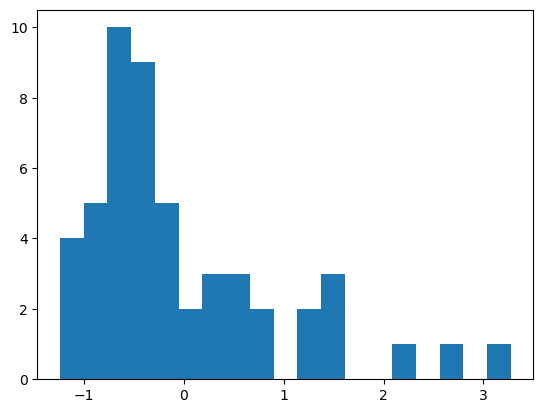

In [21]:
plt.hist(df["score_spal"], bins = 19)